# Load modules

In [1]:
import sys, os
import gc
import matplotlib.pyplot as plt

In [2]:
gc.collect()

66

# Setting

## warning

In [3]:
import warnings
warnings.simplefilter('ignore')

## Google Colab用設定

In [4]:
# 各自書き換えてください
current_project_dpath = '/content/drive/MyDrive/work/matsue_ct/20240831_データ分析研修'
print(current_project_dpath)

/content/drive/MyDrive/work/matsue_ct/20240831_データ分析研修


In [5]:
from google.colab import drive

drive.mount('/content/drive')
os.chdir(current_project_dpath)

# 現在のディレクトリを確認
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/work/matsue_ct/20240831_データ分析研修


# 不均衡データに対する対処

## under sampling

### データの作成

In [6]:
# ----------------------------------------
# Load modules
# ----------------------------------------
import numpy as np
import pandas as pd

# seed値の設定
np.random.seed(57)


# ----------------------------------------
# sample dataを作成
# ----------------------------------------
# sample size
# 負例
y0_n_samples = 950

# 正例
y1_n_samples = 50

# データ列を作成
x0_arr = np.random.normal(0, 5, y0_n_samples)
x1_arr = np.random.normal(5, 3, y1_n_samples)
y0_arr = [0] * y0_n_samples
y1_arr = [1] * y1_n_samples

# 負例データ
df0 = pd.DataFrame({'x': x0_arr, 'y': y0_arr})

# 正例データ
df1 = pd.DataFrame({'x': x1_arr, 'y': y1_arr})

# dataを結合
before_df = pd.concat(
    [df0, df1],
    axis=0
).sample(frac=1).reset_index(drop=True)

### under samplingの実行

In [7]:
print('*' * 20)
print('before')

# shapeを確認
print('shape:', before_df.shape)

# yの比率を確認
print('yの比率:')
print(before_df['y'].value_counts())
print('*' * 20 + '\n')

# under samplingを実行
# 比率
frac = len(df1) / len(df0)
print('frac:', frac)
df0 = df0.sample(frac=frac)
after_df = pd.concat([df0, df1], axis=0).reset_index(drop=True)

print('*' * 20)
print('after')

# shapeを確認
print('shape:', after_df.shape)

# yの比率を確認
print('yの比率:')
print(after_df['y'].value_counts())
print('*' * 20)

********************
before
shape: (1000, 2)
yの比率:
y
0    950
1     50
Name: count, dtype: int64
********************

frac: 0.05263157894736842
********************
after
shape: (100, 2)
yの比率:
y
0    50
1    50
Name: count, dtype: int64
********************


## over sampling

### データの作成

In [8]:
# ----------------------------------------
# Load modules
# ----------------------------------------
import numpy as np
import pandas as pd

# over samplingライブラリ
from imblearn.over_sampling import SMOTE

# seed値の設定
np.random.seed(57)


# ----------------------------------------
# sample dataを作成
# ----------------------------------------
# sample size
# 負例
y0_n_samples = 950

# 正例
y1_n_samples = 50

# データ列を作成
x0_arr = np.random.normal(0, 5, y0_n_samples)
x1_arr = np.random.normal(5, 3, y1_n_samples)
y0_arr = [0] * y0_n_samples
y1_arr = [1] * y1_n_samples

# 負例データ
df0 = pd.DataFrame({'x': x0_arr, 'y': y0_arr})

# 正例データ
df1 = pd.DataFrame({'x': x1_arr, 'y': y1_arr})

# dataを結合
before_df = pd.concat(
    [df0, df1],
    axis=0
).sample(frac=1).reset_index(drop=True)

### 説明変数分布の確認

<Axes: >

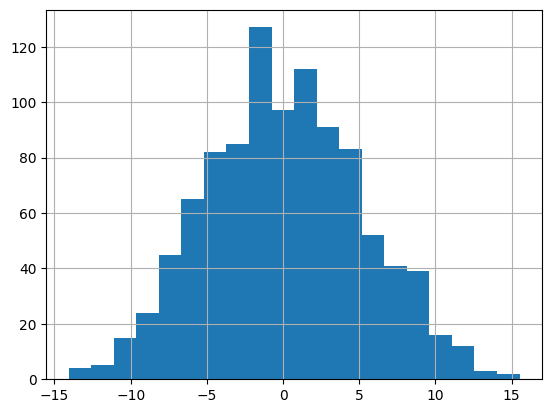

In [9]:
before_df['x'].hist(bins=20)

<Axes: >

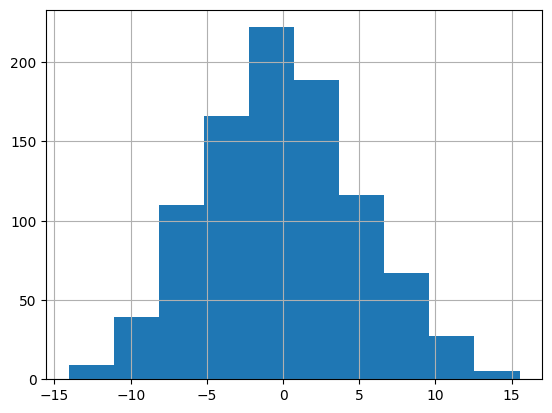

In [10]:
df0['x'].hist(bins=10)

<Axes: >

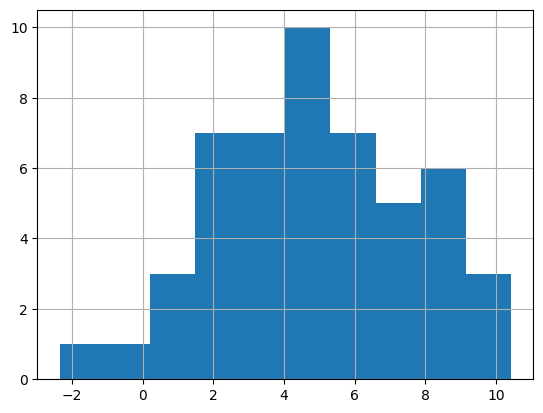

In [11]:
df1['x'].hist(bins=10)

### over samplingの実行

In [12]:
# ----------------------------------------
# Load modules
# ----------------------------------------
import numpy as np
import pandas as pd

# over samplingライブラリ
from imblearn.over_sampling import SMOTE

In [13]:
print('*' * 20)
print('before')

# shapeを確認
print('shape:', before_df.shape)

# yの比率を確認
print('yの比率:')
print(before_df['y'].value_counts())
print('*' * 20 + '\n')

# under samplingを実行
# 比率
frac = len(df1) / len(df0)
print('frac:', frac)
sm = SMOTE(random_state=57)
after_x_arr, after_y_arr = sm.fit_resample(
    before_df[['x']],
    before_df['y']
)
after_df = pd.DataFrame({
    'x': after_x_arr.values.T[0],
    'y': after_y_arr
})

print('*' * 20)
print('after')

# shapeを確認
print('shape:', after_df.shape)

# yの比率を確認
print('yの比率:')
print(after_df['y'].value_counts())
print('*' * 20)

********************
before
shape: (1000, 2)
yの比率:
y
0    950
1     50
Name: count, dtype: int64
********************

frac: 0.05263157894736842
********************
after
shape: (1900, 2)
yの比率:
y
0    950
1    950
Name: count, dtype: int64
********************


### 説明変数分布の確認

In [14]:
after_df0 = after_df[after_df['y']==0]
after_df1 = after_df[after_df['y']==1]

<Axes: >

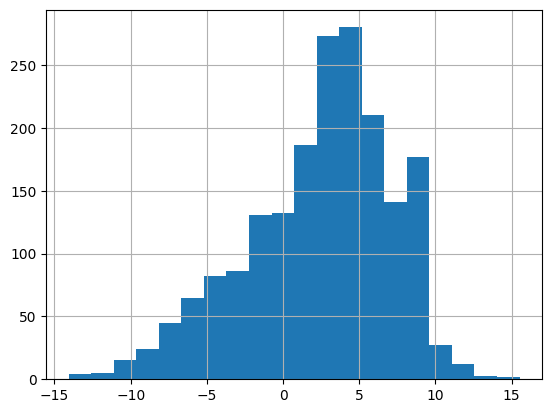

In [15]:
after_df['x'].hist(bins=20)

<Axes: >

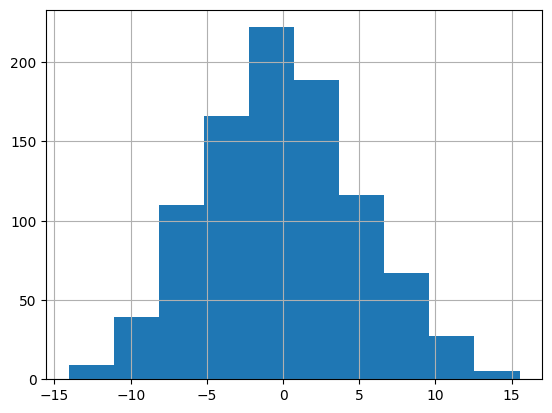

In [16]:
after_df0['x'].hist(bins=10)

<Axes: >

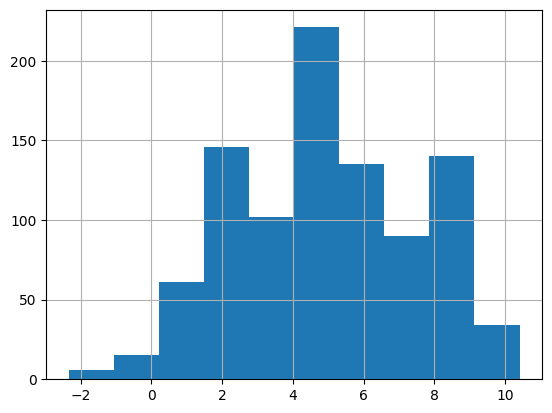

In [17]:
after_df1['x'].hist(bins=10)

# notebookをhtml化

In [18]:
!jupyter nbconvert --to html ./src/20240831_不均衡データsample_colab.ipynb

[NbConvertApp] Converting notebook ./src/20240831_不均衡データsample_colab.ipynb to html
[NbConvertApp] Writing 614000 bytes to src/20240831_不均衡データsample_colab.html
